<a href="https://colab.research.google.com/github/rumeysakara/hu-bby261-2020/blob/main/proje_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


0


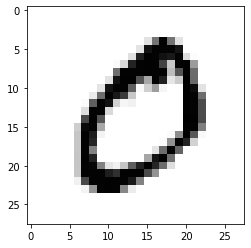

In [3]:
import matplotlib.pyplot as plt
image_index = 1 
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')


In [4]:
print(x_train[image_index])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1951 - accuracy: 0.9420
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0797 - accuracy: 0.9753
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0552 - accuracy: 0.9827
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0398 - accuracy: 0.9866
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0331 - accuracy: 0.9895
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0271 - accuracy: 0.9905
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0249 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0200 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0198 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.018

In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0663 - accuracy: 0.9840


[0.0663146823644638, 0.984000027179718]

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


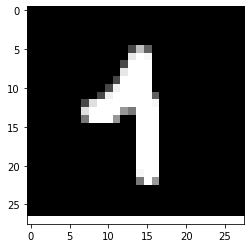

In [14]:
from PIL import Image
import numpy as np

png = Image.open("/content/drive/MyDrive/sayılar/mnist1.png").convert("L")
png = np.resize(png, (28,28,1))
pngBinary = np.array(png)
plt.imshow(pngBinary.reshape(28, 28), cmap='gray')

tahminIndex = model.predict(pngBinary.reshape(1, 28, 28, 1))
tahminRakam = np.argmax(model.predict(pngBinary.reshape(1, 28, 28, 1)), axis=-1)
print(tahminDizi)
print(tahminRakam)